In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

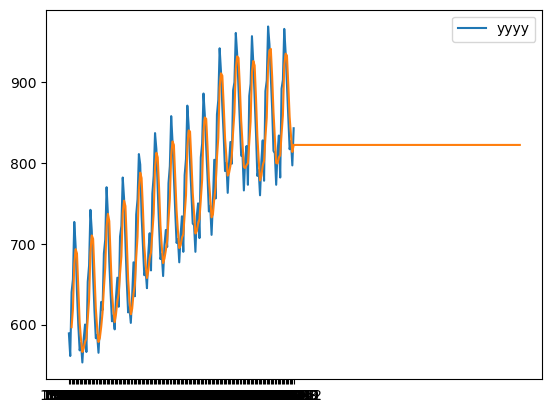

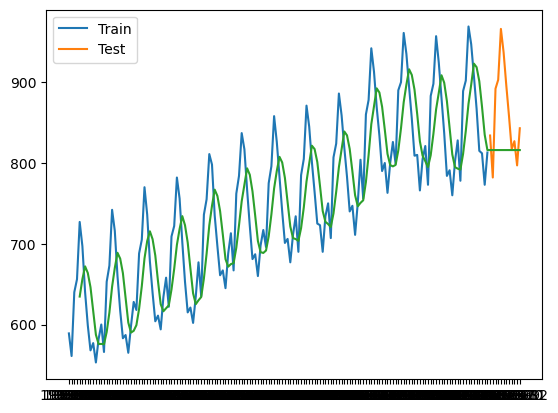

71.4970861877135


In [7]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error 
df = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\monthly-milk-production-pounds-p.csv",index_col=0)

y =df['Milk']
span=3
fcast = y.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y,label = 'yyyy')
plt.legend(loc="best")
plt.plot(MA_fcast,label = 'Moving Average')
plt.show()
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
span = 5
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label = 'Train')
plt.plot(y_test,label = 'Test')
plt.legend(loc="best")
plt.plot(MA_fcast,label = 'Moving Average')
plt.show()

rms = sqrt(mean_squared_error(y_test,MA_series))
print(rms)

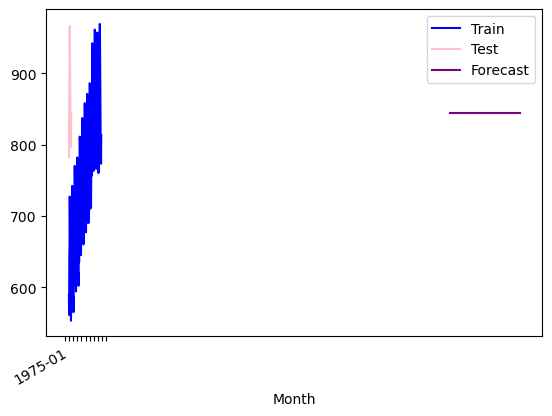

{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  57.02407775273818


In [14]:
import warnings
warnings.filterwarnings("ignore")
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
#span = 3
alpha = 0.1
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color='blue',label = 'Train')
y_test.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
plt.legend(loc="best")
plt.show()

print(fit1.params)
print("RMSE = ", sqrt(mean_squared_error(y_test, fcast1)))

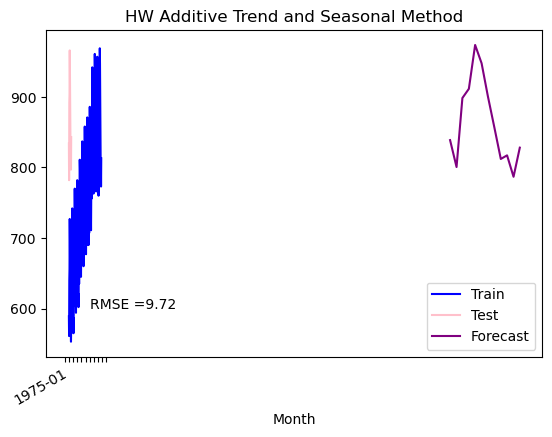

In [15]:
from math import gamma
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add  = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color='blue',label = 'Train')
y_test.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600 ,'RMSE ='+ str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()

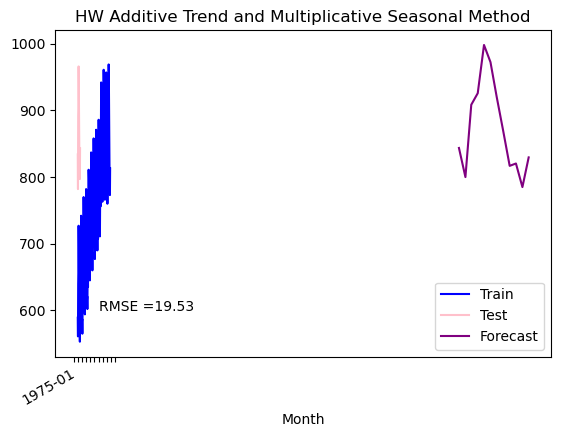

In [16]:
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_mul  = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul')
fit1 = hw_mul.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_train.plot(color='blue',label = 'Train')
y_test.plot(color='pink',label = 'Test')
fcast1.plot(color='purple',label = 'Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600 ,'RMSE ='+ str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc="best")
#print("RMSE = ", sqrt(mean_squared_error(y_tst_gdp, fcast1)))
plt.show()